# Importing

In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Read Data

In [ ]:
df = pd.read_csv('/content/sample_data/EmoBot.csv')
df.head(10)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [ ]:
df.isna().sum()

,0
Comment,0
Emotion,0


In [ ]:
df.Emotion.value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


<ipython-input-37-20ee4809967a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


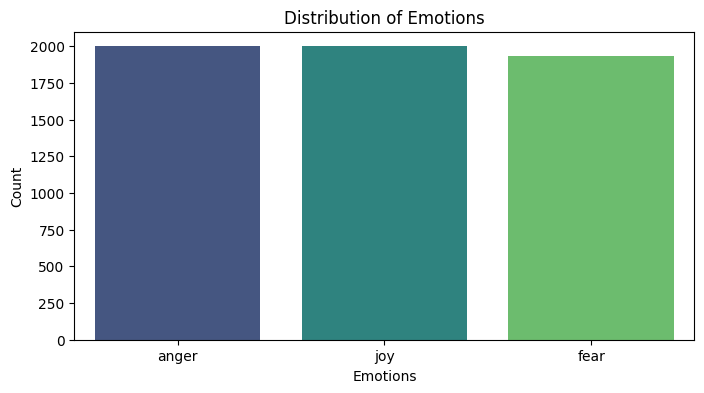

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Emotion' is the column with emotion labels
emotion_counts = df['Emotion'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()



- Balanced Data

# Take sample


In [ ]:
cmt = df.iloc[3,0]
lbl = df.iloc[3,1]

In [ ]:
print(cmt,lbl,sep='==> ')

ive been really angry with r and i feel like an idiot for trusting him in the first place==> joy


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(cmt)

# Preprocessing Steps

## Word Tokenization

In [ ]:
for token in doc:
     print(token)

i
ve
been
really
angry
with
r
and
i
feel
like
an
idiot
for
trusting
him
in
the
first
place


## lemmatization

In [ ]:
 for token in doc:
     print(f"{token} ==> {token.lemma_}")

i ==> I
ve ==> ve
been ==> be
really ==> really
angry ==> angry
with ==> with
r ==> r
and ==> and
i ==> I
feel ==> feel
like ==> like
an ==> an
idiot ==> idiot
for ==> for
trusting ==> trust
him ==> he
in ==> in
the ==> the
first ==> first
place ==> place


## stop word indication

In [ ]:
 for token in doc:
     if token.is_stop or token.is_punct:
         print(f'{token} ==> Stop')
     else:
         print(f'{token} ==> not Stop')

i ==> Stop
ve ==> not Stop
been ==> Stop
really ==> Stop
angry ==> not Stop
with ==> Stop
r ==> not Stop
and ==> Stop
i ==> Stop
feel ==> not Stop
like ==> not Stop
an ==> Stop
idiot ==> not Stop
for ==> Stop
trusting ==> not Stop
him ==> Stop
in ==> Stop
the ==> Stop
first ==> Stop
place ==> not Stop


# Preprocess Function

In [ ]:
def preprocess(text):
    doc = nlp(text)
    filtered_text = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)

    return ' '.join(filtered_text)

In [ ]:
df['Preprocessed_comments'] = df['Comment'].apply(preprocess)

In [ ]:
df.Preprocessed_comments.head()

,Preprocessed_comments
0,seriously hate subject death feel reluctant drop
1,m life feel appalled
2,sit write start dig feeling think afraid accep...
3,ve angry r feel like idiot trust place
4,feel suspicious outside like rapture happen


In [ ]:
df

,Comment,Emotion,Preprocessed_comments
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,feel suspicious outside like rapture happen
...,...,...,...
5932,i begun to feel distressed for you,fear,begin feel distressed
5933,i left feeling annoyed and angry thinking that...,anger,leave feel annoyed angry thinking center stupi...
5934,i were to ever get married i d have everything...,joy,marry d ready offer ve get club perfect good l...
5935,i feel reluctant in applying there because i w...,fear,feel reluctant apply want able find company kn...


## Encoding

In [ ]:
encoder = LabelEncoder()
df['Emotion Number'] = encoder.fit_transform(df['Emotion'])

In [ ]:
df

,Comment,Emotion,Preprocessed_comments,Emotion Number
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop,1
1,im so full of life i feel appalled,anger,m life feel appalled,0
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...,1
3,ive been really angry with r and i feel like a...,joy,ve angry r feel like idiot trust place,2
4,i feel suspicious if there is no one outside l...,fear,feel suspicious outside like rapture happen,1
...,...,...,...,...
5932,i begun to feel distressed for you,fear,begin feel distressed,1
5933,i left feeling annoyed and angry thinking that...,anger,leave feel annoyed angry thinking center stupi...,0
5934,i were to ever get married i d have everything...,joy,marry d ready offer ve get club perfect good l...,2
5935,i feel reluctant in applying there because i w...,fear,feel reluctant apply want able find company kn...,1


# Featrue Selection

In [ ]:
X = df['Preprocessed_comments']
y = df['Emotion Number']

# Split Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=57)

# Featrue Engineering

In [ ]:
v = TfidfVectorizer() # Factorization (convert into numeric values )
X_train_cv = v.fit_transform(X_train) # fit => (mapping of unique terms to indices), transform => Converts the text data in X_train into a sparse matrix (rows = documents, columns = terms)
X_test_cv  = v.transform(X_test)


In [ ]:
X_train_cv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# ML Models

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SupportVectorMachine": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('svc', SVC(probability=True)),
        ('dt', DecisionTreeClassifier())],
        voting='soft'),
    "KNeighbors": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}

results = []
for model_name, model in models.items():
    print(f"\nTraining and evaluating model: {model_name}")
    try:
        model.fit(X_train_cv, y_train)
        y_pred = model.predict(X_test_cv)
        acc = accuracy_score(y_test, y_pred)

        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        results.append({
            'Model': model_name,
            'Accuracy': acc * 100,
        })

    except Exception as e:
        print(f"Error training {model_name}: {e}")

results_df = pd.DataFrame(results)
display(results_df)


Training and evaluating model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       395
           1       0.94      0.92      0.93       391
           2       0.91      0.95      0.93       402

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

Confusion Matrix:
[[353  16  26]
 [ 17 360  14]
 [ 12   8 382]]

Training and evaluating model: SupportVectorMachine
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       395
           1       0.94      0.92      0.93       391
           2       0.90      0.95      0.93       402

    accuracy                           0.93      1188
   macro avg       0.93      0.92      0.93      1188
weighted avg       0.93      0.93      0.93      1188

Confusion Matrix:
[[357 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       395
           1       0.97      0.94      0.95       391
           2       0.92      0.95      0.93       402

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188

Confusion Matrix:
[[364   3  28]
 [ 17 367   7]
 [ 12  10 380]]

Training and evaluating model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6442
[LightGBM] [Info] Number of data points in the train set: 4749, number of used features: 338
[LightGBM] [Info] Start training from score -1.084810
[LightGBM] [Info] Start training from score -1.122263
[LightGBM] [Info] Start traini

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       395
           1       0.91      0.88      0.90       391
           2       0.81      0.89      0.85       402

    accuracy                           0.86      1188
   macro avg       0.87      0.86      0.86      1188
weighted avg       0.87      0.86      0.86      1188

Confusion Matrix:
[[321  19  55]
 [ 17 345  29]
 [ 28  15 359]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Model,Accuracy
0,LogisticRegression,92.171717
1,SupportVectorMachine,92.508418
2,DecisionTree,92.845118
3,RandomForest,92.676768
4,BaggingClassifier,93.602694
5,VotingClassifier,93.602694
6,KNeighbors,81.902357
7,CatBoost,94.696970
8,XGBoost,93.518519
9,LightGBM,86.279461


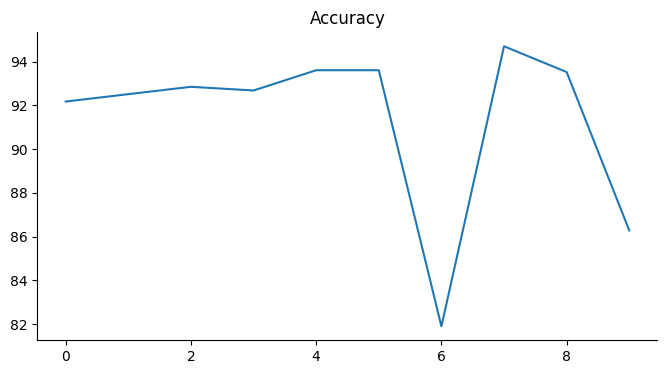

In [ ]:
# Accuracy

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)